# Chloe Warren – C1848857

# Hello! If you are unfamiliar with Jupyter Notebook you can simply press shift+enter to run cells, run the cells in the order they appear, you MUST upload the transactions.txt file to the jupyter folder you have this notebook in.

### Required Libraries

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import platform
print("Python version:", platform.python_version()) 
#so you know what I am using

Python version: 3.8.5


In [3]:
import pandas as pd
import numpy as np
import zipfile
import json

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [5]:
from plotnine import *

In [6]:
# source: https://gist.github.com/sainathadapa/eb3303975196d15c73bac5b92d8a210f
# helper functions
def anti_join(x, y, on):
    """Return rows in x which are not present in y"""
    ans = pd.merge(left=x, right=y, how='left', indicator=True, on=on)
    ans = ans.loc[ans._merge == 'left_only', :].drop(columns='_merge')
    return ans

def anti_join_all_cols(x, y):
    """Return rows in x which are not present in y"""
    assert set(x.columns.values) == set(y.columns.values)
    return anti_join(x, y, x.columns.tolist())

# Question 1: Load

•Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here

•Please describe the structure of the data. Number of records and fields in each record?

•Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.


# Dataset Preparation

Downloading and Unzipping the dataset.

In [7]:
# Run at start
!curl https://raw.githubusercontent.com/CapitalOneRecruiting/DS/master/transactions.zip
with open("transactions.txt") as f: 
    raw_data = f.readlines() 
    raw_json = map(json.loads,raw_data)
df = pd.DataFrame.from_records(raw_json)
df.to_csv("transaction.csv", index=False)

In [8]:
df = pd.read_csv("transaction.csv")

In [9]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [10]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
accountNumber,786363,NaN,NaN,NaN,5.37233e+08,2.55421e+08,1.00088e+08,3.30133e+08,5.07456e+08,7.6762e+08,9.9939e+08
customerId,786363,NaN,NaN,NaN,5.37233e+08,2.55421e+08,1.00088e+08,3.30133e+08,5.07456e+08,7.6762e+08,9.9939e+08
creditLimit,786363,NaN,NaN,NaN,10759.5,11636.2,250,5000,7500,15000,50000
availableMoney,786363,NaN,NaN,NaN,6250.73,8880.78,-1005.63,1077.42,3184.86,7500,50000
transactionDateTime,786363,776637,2016-05-28T14:24:41,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transactionAmount,786363,NaN,NaN,NaN,136.986,147.726,0,33.65,87.9,191.48,2011.54
merchantName,786363,2490,Uber,25613,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acqCountry,781801,4,US,774709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchantCountryCode,785639,4,US,778511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
posEntryMode,782309,NaN,NaN,NaN,9.04994,16.7741,2,2,5,9,90


In [11]:
df.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521862
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       4
merchantCountryCode              4
posEntryMode                     5
posConditionCode                 3
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  3
echoBuffer                       0
currentBalance              487318
merchantCity                     0
merchantState                    0
merchantZip                      0
cardPresent                      2
posOnPremises                    0
recurringAuthInd                 0
expirationDateKeyInMatch         2
isFraud             

Let's see what countries we have accounts in and what the frequency is in each country

In [12]:
pd.value_counts(df["acqCountry"])
#looks for the different types of records in acqCountry and counts how many records have this type

US     774709
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64

# Data Cleaning

Converting all empty string to NA in column of type string

In [13]:
df.replace(r'^\s*$', np.nan, regex=True, inplace = True)

Dropping echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises and recurringAuthInd since these have all observations missing.

In [14]:
df.drop(["echoBuffer", "merchantCity", "merchantState", "merchantZip", "posOnPremises", "recurringAuthInd"], axis=1, inplace=True)

Changing date column to date data type.

In [15]:
df[["transactionDateTime", "currentExpDate", "accountOpenDate", "dateOfLastAddressChange"]] = df[["transactionDateTime", "currentExpDate", "accountOpenDate", "dateOfLastAddressChange"]].apply(pd.to_datetime)

Converting some string column to categories type

In [16]:
cols = ['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode','merchantCategoryCode']
df[cols] = df[cols].astype('category')

## Write up
### In conclusion we have 786363 records from 5000 account holders and we are looking at 29 fields, we looked at overall information on the fields. We are missing some information on account country, merchant country code, posEntryMode, posConditionCode, and transaction type. We have no information for merchant's City, merchant's State, merchant's zipcode, posOnPremises, and recurringAuthInd. The rest of our fields we have no null values. We looked into one field in depth out of curiousity and found some interesting information. We saw that we have accounts in Mexico(3130), Canada(2424), and Puerto Rico(1538), but of course the majority of our accounts are in the US(774709) as a US based company.

# Question 2: Plot

•Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

•Report any structure you find and any hypotheses you have about that structure.

Visualizing distribution of Transaction Amount

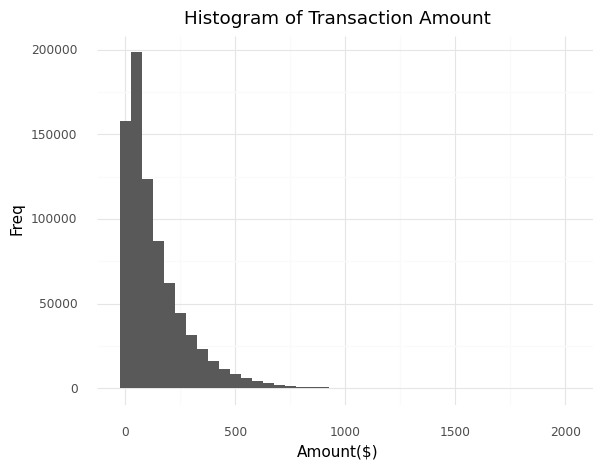

<ggplot: (8769300425256)>

In [17]:
(ggplot(df,aes('transactionAmount')) +
  geom_histogram(binwidth = 50)+
  labs(
    title = "Histogram of Transaction Amount",
    x = "Amount($)",
    y = "Freq"
  )+
  theme_minimal())

Here most of the transaction lies below $100 and the distribution is positively skewed.

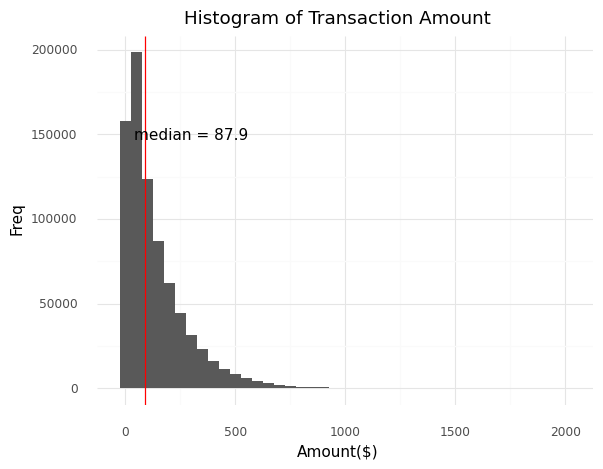

<ggplot: (8769527548742)>

In [18]:
median_val = df.transactionAmount.median() 
text = "median = " + str(median_val)
(ggplot(df,aes('transactionAmount')) +
  geom_histogram(binwidth = 50)+
  labs(
    title = "Histogram of Transaction Amount",
    x = "Amount($)",
    y = "Freq"
  )+
  geom_vline(xintercept = median_val, color="red")+
  annotate("text",x=300,y=150000,label=text)+
  theme_minimal())

This distribution looks like a log normal distribution.

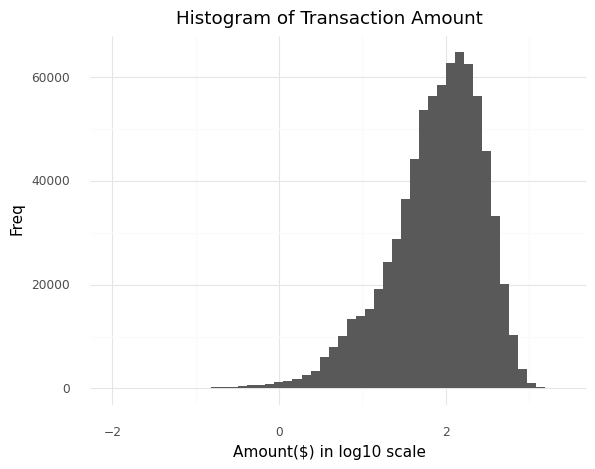

<ggplot: (8769527525130)>

In [19]:
df_transac = df[['transactionAmount']].apply(np.log10)
df_transac.replace([np.inf, -np.inf], np.nan, inplace=True)
df_transac.dropna(inplace=True)

(ggplot(df_transac,aes('transactionAmount')) +
  geom_histogram(bins=50)+
  labs(
    title = "Histogram of Transaction Amount",
    x = "Amount($) in log10 scale",
    y = "Freq"
  )+
  theme_minimal())

## Write up
### In conclusion the shape of the histogram is skewed right which makes sense since people make smaller purchaces on a more frequent basis than large payments. Now that carrying cash has become less common for people in and above lower middle class people use credit cards everyday on a normal basis. I would hypothesize that if we kept looking at lower purchases this general trend of skewness would stay but that the shape would change and the bars would become more level to eachother.

# Question 3: Data Wrangling - Duplicate Transactions

You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

•Can you programmatically identify reversed and multi-swipe transactions?

•What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)

•Did you find anything interesting about either kind of transaction?



# Data Wrangling

## Reversed Transaction
Looking into Purchased and Reversed pairs of transaction(ordered by datetime) per customer.  
Here I am grouping the dataset by customer id and checking if transaction type matches with its lagged version.

In [20]:
def func(df):
    df["not_matched"] = (df["transactionType"] != df["transactionType"].shift(-1,fill_value="PURCHASE"))
    return df

df_rev = df[((df.transactionType == "PURCHASE") | (df.transactionType == "REVERSAL"))].\
            sort_values(["customerId", "transactionDateTime"])

df_rev = df_rev[df_rev[["customerId","transactionType"]].\
                   groupby(["customerId"]).\
                   apply(func).not_matched]

df_rev[["accountNumber","transactionDateTime","transactionAmount", "transactionType"]].head(10)

,accountNumber,transactionDateTime,transactionAmount,transactionType
541963,100088067,2016-11-20 07:57:05,22.32,PURCHASE
541964,100088067,2016-11-20 08:00:04,22.32,REVERSAL
87919,100328049,2016-01-15 20:34:35,43.74,PURCHASE
87920,100328049,2016-01-15 20:36:18,43.74,REVERSAL
87935,100328049,2016-03-24 22:57:15,284.97,PURCHASE
87936,100328049,2016-03-26 17:35:09,284.97,REVERSAL
151498,100737756,2016-06-05 20:44:58,130.49,PURCHASE
151499,100737756,2016-06-06 22:56:52,93.67,REVERSAL
151540,100737756,2016-08-24 05:27:01,57.94,PURCHASE
151541,100737756,2016-08-24 20:21:19,501.29,REVERSAL


Not all Purchased and Reversed pairs are actually Reversed Transaction. So,  
For a transaction to be reversed, a normal purchase should be followed by a reversed and both should have same transaction amount.

In [21]:
def func(df):
    df["avg_ammount"] = df["transactionAmount"].mean()
    return df

df_rev_eq = df_rev.copy().reset_index()
df_rev_eq["pair_id"] = df_rev_eq.index//2

df_rev_eq = df_rev_eq.groupby(["customerId", "pair_id"]).apply(func)
df_rev_eq = df_rev_eq[(df_rev_eq.transactionAmount == df_rev_eq.avg_ammount)]

In [22]:
df_rev_eq[["accountNumber","transactionDateTime","transactionAmount", "transactionType"]].head(10)

,accountNumber,transactionDateTime,transactionAmount,transactionType
0,100088067,2016-11-20 07:57:05,22.32,PURCHASE
1,100088067,2016-11-20 08:00:04,22.32,REVERSAL
2,100328049,2016-01-15 20:34:35,43.74,PURCHASE
3,100328049,2016-01-15 20:36:18,43.74,REVERSAL
4,100328049,2016-03-24 22:57:15,284.97,PURCHASE
5,100328049,2016-03-26 17:35:09,284.97,REVERSAL
12,101376441,2016-07-05 15:03:41,96.63,PURCHASE
13,101376441,2016-07-12 00:44:32,96.63,REVERSAL
26,101596991,2016-12-30 19:49:59,294.01,PURCHASE
27,101596991,2016-12-30 19:50:06,294.01,REVERSAL


So total reversal amount and count is

In [23]:
print("total reversal amount",df_rev_eq[df_rev_eq.transactionType == "REVERSAL"].transactionAmount.sum())
print("total reversal count",df_rev_eq[df_rev_eq.transactionType == "REVERSAL"].transactionAmount.count())

total reversal amount 772545.4
total reversal count 5219


Removing all Purchased and Reversed pairs

In [24]:
df_rev_eq.drop(['avg_ammount', 'pair_id'], axis=1, inplace=True)
df = anti_join_all_cols(df, df_rev)

## Multi-swipe Transaction
A transaction is multi-swiped if the same transaction occurs multiple times but in a short duration. I am assuming a short duration to be 10 minutes.  
Here I am creating a attribute date_index which is the 10minute floor of transactionDateTime. If 'customerId', 'date_index','transactionAmount' and 'merchantName' all matches then the trasaction is multi-swipe.

In [25]:
def func(df):
    return df.drop_duplicates(['transactionAmount', 'merchantName'])

df_multi_all = df.copy()
df_multi_all['date_index'] = df.transactionDateTime.dt.floor("600S")
df_multi_all = df_multi_all.drop_duplicates(['customerId', 'date_index','transactionAmount', 'merchantName'], keep=False)
df_multi_all = anti_join_all_cols(df, df_multi_all.drop(['date_index'], axis=1))

In [26]:
df_multi_all[["accountNumber","transactionDateTime","transactionAmount"]].\
        sort_values(["accountNumber", "transactionDateTime"]).\
        head(15)

,accountNumber,transactionDateTime,transactionAmount
514396,100088067,2016-10-16 18:01:00,411.35
514397,100088067,2016-10-16 18:01:02,411.35
143905,100737756,2016-01-18 01:55:24,693.50
143906,100737756,2016-01-18 01:55:28,693.50
143907,100737756,2016-01-18 01:58:26,693.50
143989,100737756,2016-07-02 12:05:04,211.22
143990,100737756,2016-07-02 12:07:00,211.22
143994,100737756,2016-07-10 14:31:07,43.25
143995,100737756,2016-07-10 14:32:06,43.25
209050,101132326,2016-08-24 02:09:08,188.86


Total number of transactions and total dollar amount for the multi-swipe transactions

In [27]:
# Considering First transaction to be normal
df_multi_normal = df_multi_all.copy()
df_multi_normal['date_index'] = df_multi_normal.transactionDateTime.dt.floor("600S")

df_multi_normal = df_multi_normal.drop_duplicates(['customerId', 'date_index','transactionAmount', 'merchantName'])

df_multi = anti_join_all_cols(df_multi_all, df_multi_normal.drop(['date_index'], axis=1))

print("total multi-swipe amount",df_multi.transactionAmount.sum())
print("total multi-swipe count",df_multi.transactionAmount.count())

total multi-swipe amount 910037.8699999999
total multi-swipe count 6288


Removing all Multi-swipe transactions

In [28]:
df = anti_join_all_cols(df, df_multi_all)

## Write up
### In conclusion we can see that the total dollar amount in Multi-swipe transactions is higher which makes sense since reversals are duplicated once while multi-swipe can be duplicated more than once. I found it interesting to see that there were so many counts of multi-swipe since there are usually precautions taken against double charges but the count is still relatively sensible given how large the data set is.

# Question 4: Model

Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

•Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).

•Provide an estimate of performance using an appropriate sample, and show your work.

•Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

# Modelling

## Balancing the dataset

Our dataset is highly unbalanced.

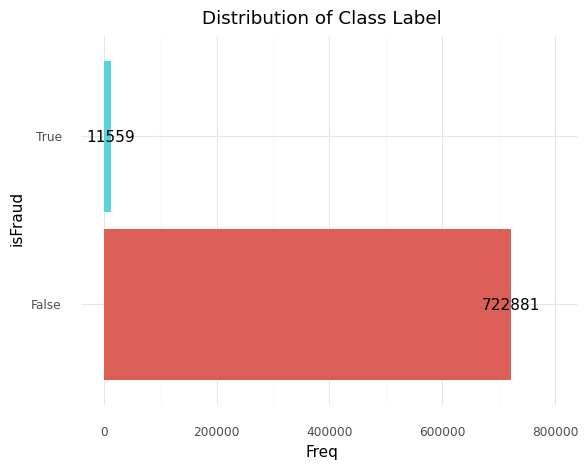

<ggplot: (8769533044303)>

In [29]:
df_temp = pd.DataFrame(df.isFraud.value_counts()).reset_index()
df_temp.columns = ["isFraud","n"]

(ggplot(df_temp,aes('isFraud','n', fill='isFraud')) +
  geom_col()+
  guides(fill = False)+
  labs(
    title = "Distribution of Class Label",
    y = "Freq"
  )+
  geom_text(aes(label = 'n'))+
  scale_y_continuous(limits = (0,800000))+
  coord_flip()+
  theme_minimal())

We have to sample our dataset to make it balanced. Here I am undersampling 11559 transactions from both Fraud and not Fraud transactions.

In [30]:
def func(df,n):
    return df.sample(n)

df_sample = df.groupby(['isFraud']).apply(func,n=11559).reset_index(drop=True)

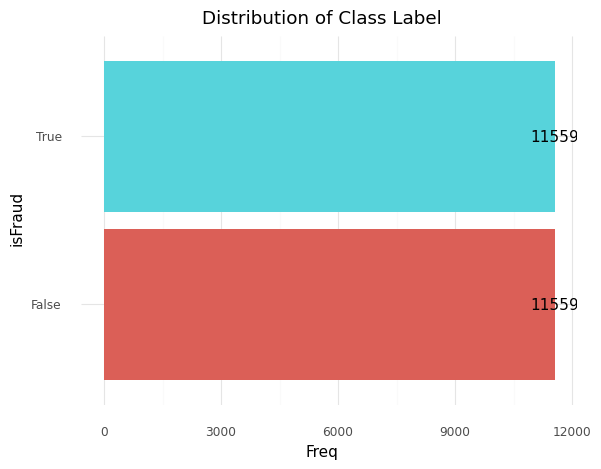

<ggplot: (8769533067436)>

In [31]:
df_temp = pd.DataFrame(df_sample.isFraud.value_counts()).reset_index()
df_temp.columns = ["isFraud","n"]

(ggplot(df_temp,aes('isFraud','n', fill='isFraud')) +
  geom_col()+
  guides(fill = False)+
  labs(
    title = "Distribution of Class Label",
    y = "Freq"
  )+
  geom_text(aes(label = 'n'))+
  coord_flip()+
  theme_minimal())

## Feature Engineering

#### Feature Selection
Some attributes that obviously don't have any predictive power  
1. accountNumber  
2. customerId  
3. cardLast4Digits 

#### Merchant    

Too many merchants and their frequencies are low.

In [32]:
df_sample.merchantName.value_counts()

Lyft                             1048
Uber                              873
ebay.com                          816
cheapfast.com                     662
Fresh Flowers                     644
                                 ... 
Burger King #655453                 1
Auntie Anne's #78554                1
Golds Gym #508579                   1
Sprint Communications #113920       1
Burger King #486122                 1
Name: merchantName, Length: 1931, dtype: int64

Even if we remove the identifier, there are many merchants and their frequencies are low.

In [33]:
df_sample.merchantName.replace("#.*", "",regex=True).value_counts()

Lyft                1048
EZ Putt Putt         917
Uber                 873
ebay.com             816
AMC                  787
                    ... 
Barbells               3
Northtown Beauty       2
Northtown Salon        2
EZ Wireless            1
Fast Mobile            1
Name: merchantName, Length: 199, dtype: int64

Count for merchant category.

In [34]:
df_sample.merchantCategoryCode.value_counts()

online_retail           7513
fastfood                2705
online_gifts            2479
entertainment           2075
food                    2025
rideshare               1921
hotels                   716
airline                  703
auto                     551
subscriptions            519
health                   395
fuel                     394
personal care            333
mobileapps               241
online_subscriptions     192
furniture                182
food_delivery            121
gym                       32
cable/phone               21
Name: merchantCategoryCode, dtype: int64

Let's keep top 6 merchant category and lump remaining to other.

In [35]:
dic = dict(df_sample.merchantCategoryCode.value_counts())
replacing_dic = dict()
for x,v in dic.items():
    if v>1000:
        replacing_dic[x] = x
    else:
        replacing_dic[x] = "Other"

df_sample["merchantCategoryCode"] = df_sample.merchantCategoryCode.apply(lambda x: replacing_dic[x])
df_sample.merchantCategoryCode.value_counts()

online_retail    7513
Other            4400
fastfood         2705
online_gifts     2479
entertainment    2075
food             2025
rideshare        1921
Name: merchantCategoryCode, dtype: int64

Online gifts, retail and rideshare are more effected by fraud

/opt/anaconda3/lib/python3.8/site-packages/plotnine/facets/facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


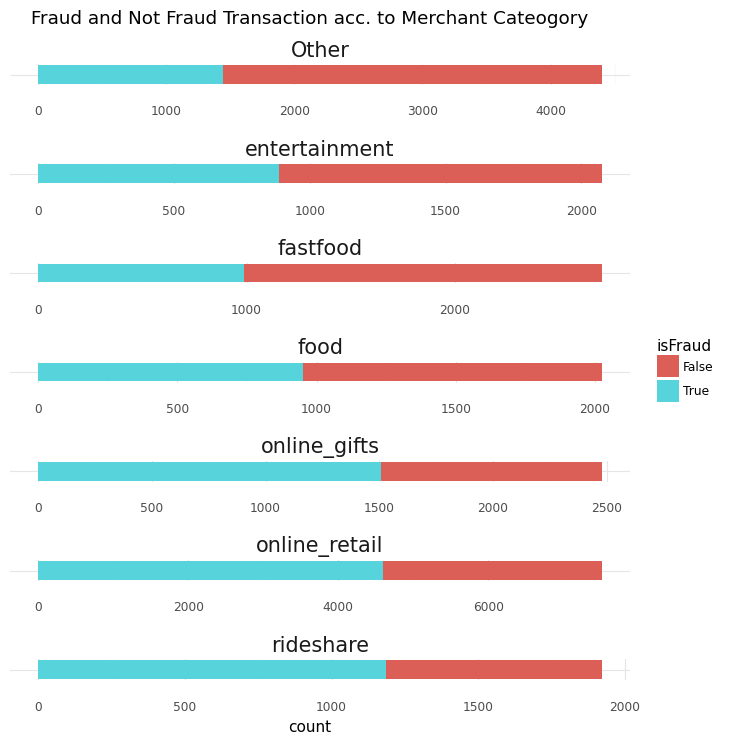

<ggplot: (8769527427319)>

In [36]:
(ggplot(df_sample,aes('merchantCategoryCode', fill='isFraud'))+
  geom_bar()+
  coord_flip()+
  facet_wrap('~merchantCategoryCode', scales = "free", ncol = 1)+
  labs(
    title = "Fraud and Not Fraud Transaction acc. to Merchant Cateogory"
  )+
 theme_minimal()+
  theme(axis_title_y=element_blank(),
        axis_text_y=element_blank(),
        panel_spacing = 0.5,
        strip_text_x = element_text(size = 15),
        figure_size = (8, 8)))

#### Countries  

ACQ Country  

/opt/anaconda3/lib/python3.8/site-packages/plotnine/facets/facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


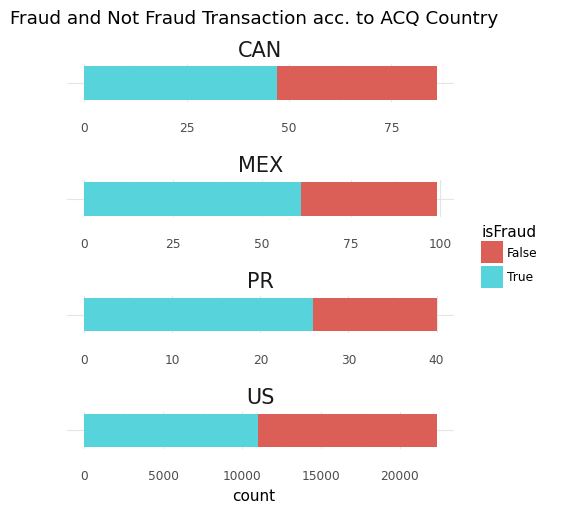

<ggplot: (8769527397437)>

In [37]:
(ggplot(df_sample.dropna(),aes('acqCountry', fill='isFraud'))+
  geom_bar()+
  coord_flip()+
  facet_wrap('~acqCountry', scales = "free", ncol = 1)+
  labs(
    title = "Fraud and Not Fraud Transaction acc. to ACQ Country"
  )+
  theme_minimal()+
  theme(axis_title_y=element_blank(),
        axis_text_y=element_blank(),
        panel_spacing = 0.5,
        strip_text_x = element_text(size = 15),
        figure_size = (5, 5)))

Merchant Country Code  

/opt/anaconda3/lib/python3.8/site-packages/plotnine/facets/facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


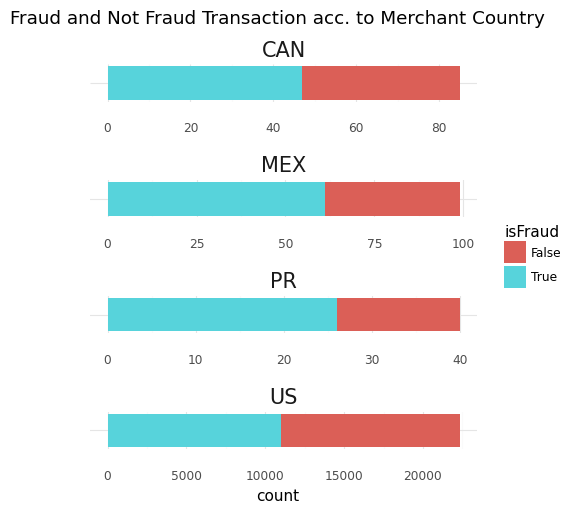

<ggplot: (8769526846757)>

In [38]:
(ggplot(df_sample.dropna(),aes('merchantCountryCode', fill='isFraud'))+
  geom_bar()+
  coord_flip()+
  facet_wrap('~merchantCountryCode', scales = "free", ncol = 1)+
  labs(
    title = "Fraud and Not Fraud Transaction acc. to Merchant Country"
  )+
  theme_minimal()+
  theme(axis_title_y=element_blank(),
        axis_text_y=element_blank(),
        panel_spacing = 0.5,
        strip_text_x = element_text(size = 15),
        figure_size = (5, 5)))

#### POS  

POS Entry Mode with 09 are more fraudulent and 05 more likely to be safe.

/opt/anaconda3/lib/python3.8/site-packages/plotnine/facets/facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


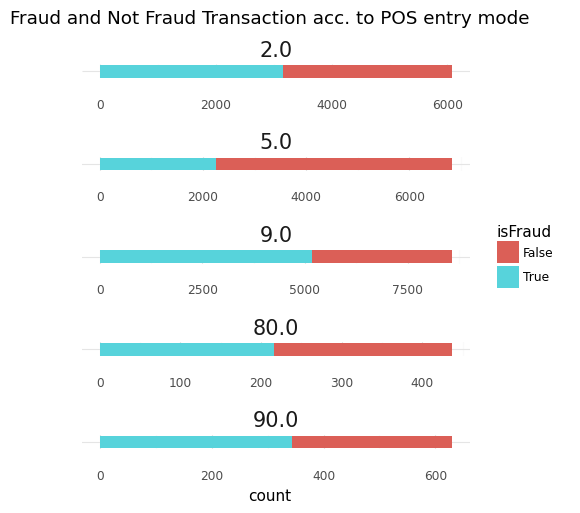

<ggplot: (8769514293598)>

In [39]:
(ggplot(df_sample.dropna(),aes('posEntryMode', fill='isFraud'))+
  geom_bar()+
  coord_flip()+
  facet_wrap('~posEntryMode', scales = "free", ncol = 1)+
  labs(
    title = "Fraud and Not Fraud Transaction acc. to POS entry mode"
  )+
  theme_minimal()+
  theme(axis_title_y=element_blank(),
        axis_text_y=element_blank(),
        panel_spacing = 0.5,
        strip_text_x = element_text(size = 15),
        figure_size = (5, 5)))

POS Condition Code with 99 are more likely to be fraudulent.

/opt/anaconda3/lib/python3.8/site-packages/plotnine/facets/facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


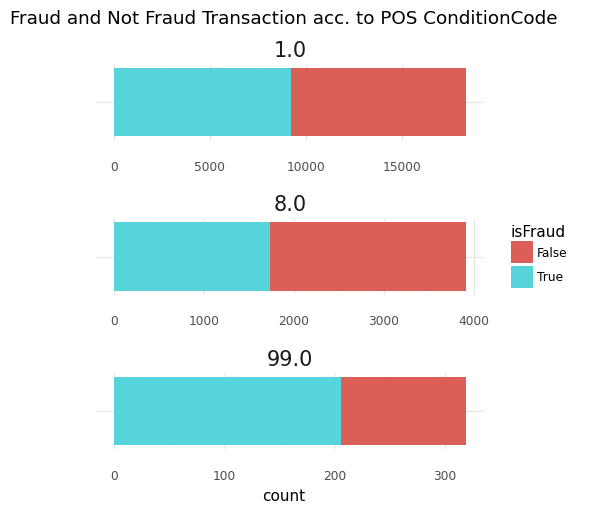

<ggplot: (8769517002063)>

In [40]:
(ggplot(df_sample.dropna(),aes('posConditionCode', fill='isFraud'))+
  geom_bar()+
  coord_flip()+
  facet_wrap('~posConditionCode', scales = "free", ncol = 1)+
  labs(
    title = "Fraud and Not Fraud Transaction acc. to POS ConditionCode"
  )+
  theme_minimal()+
  theme(axis_title_y=element_blank(),
        axis_text_y=element_blank(),
        panel_spacing = 0.5,
        strip_text_x = element_text(size = 15),
        figure_size = (5, 5)))

If card is physically present, it is less likely to be fraud.

/opt/anaconda3/lib/python3.8/site-packages/plotnine/facets/facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


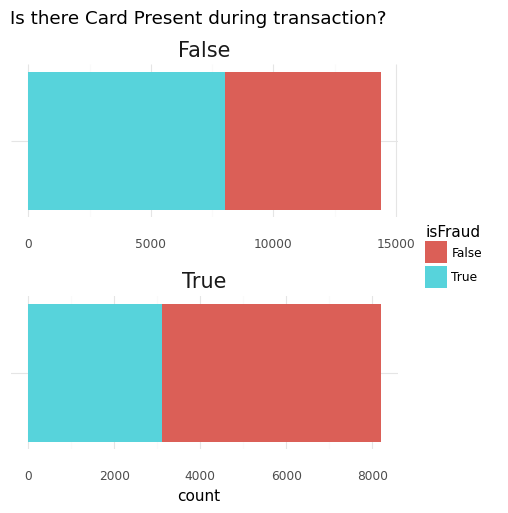

<ggplot: (8769513688643)>

In [41]:
(ggplot(df_sample.dropna(),aes('cardPresent', fill='isFraud'))+
  geom_bar()+
  coord_flip()+
  facet_wrap('~cardPresent', scales = "free", ncol = 1)+
  labs(
    title = "Is there Card Present during transaction?"
  )+
  theme_minimal()+
  theme(axis_title_y=element_blank(),
        axis_text_y=element_blank(),
        panel_spacing = 0.5,
        strip_text_x = element_text(size = 15),
        figure_size = (5, 5)))

Most of the values in expirationDateKeyInMatch is FALSE.

In [42]:
df_sample.expirationDateKeyInMatch.value_counts()

False    23088
True        30
Name: expirationDateKeyInMatch, dtype: int64

Taking everything in account, I have selected follow features:  
1. acqCountry  
2. creditLimit  
3. availableMoney            
4. transactionAmount  
5. posEntryMode  
6. posConditionCode         
7. merchantCategoryCode              
8. currentBalance           
9. cardPresent  

#### Feature Creation  

Lets create some features:  
1. Transaction Days since acc. creation i.e. transDays (Are fraudulent transaction performed by card that are just created?)  
2. Days remaining for expiry of the card i.e. expiryDays (Are older cards more likely to be safe?)  
3. Does CVV match? i.e matchedCvv  
4. Days since last address change. i.e. addressChangeDays (Cards whose address are recently changed, are they used for fraudulent transaction ?)  


In [43]:
df_sample['transDays'] = (df_sample.transactionDateTime - df_sample.accountOpenDate).apply(lambda x: x.days)
df_sample['expiryDays'] = (df_sample.currentExpDate - df_sample.transactionDateTime).apply(lambda x: x.days)
df_sample['addressChangeDays'] = (df_sample.transactionDateTime - df_sample.dateOfLastAddressChange).apply(lambda x: x.days)
df_sample['matchedCvv'] = (df_sample.enteredCVV == df_sample.cardCVV)

Is there any significant difference in the distribution of Fraud and not Fraud from the feature created?

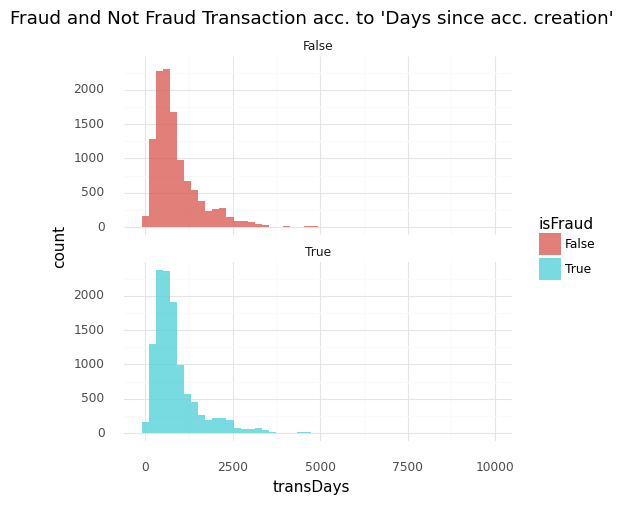

<ggplot: (8769513695886)>

In [44]:
(ggplot(df_sample,aes('transDays', fill='isFraud'))+
  geom_histogram(bins=50,alpha=0.8,)+
  labs(
    title = "Fraud and Not Fraud Transaction acc. to 'Days since acc. creation'"
  )+
  facet_wrap('~isFraud',ncol=1)+
  theme_minimal()+
  theme(figure_size = (5, 5)))

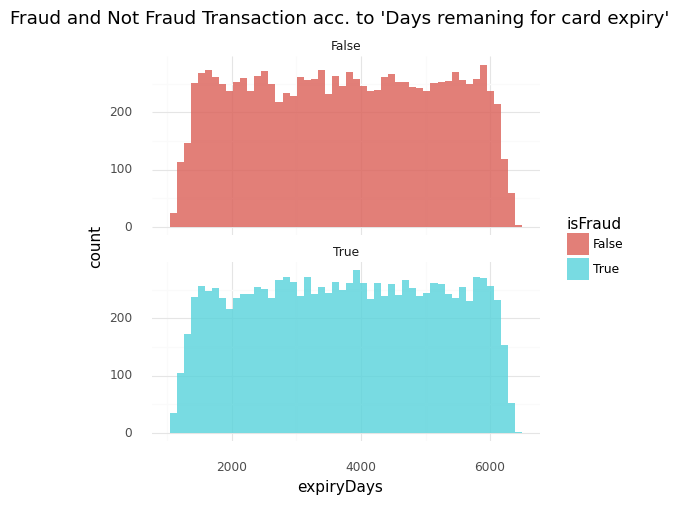

<ggplot: (8769540933654)>

In [45]:
(ggplot(df_sample,aes('expiryDays', fill='isFraud'))+
  geom_histogram(bins=50,alpha=0.8,)+
  labs(
    title = "Fraud and Not Fraud Transaction acc. to 'Days remaning for card expiry'"
  )+
  facet_wrap('~isFraud',ncol=1)+
  theme_minimal()+
  theme(figure_size = (5, 5)))

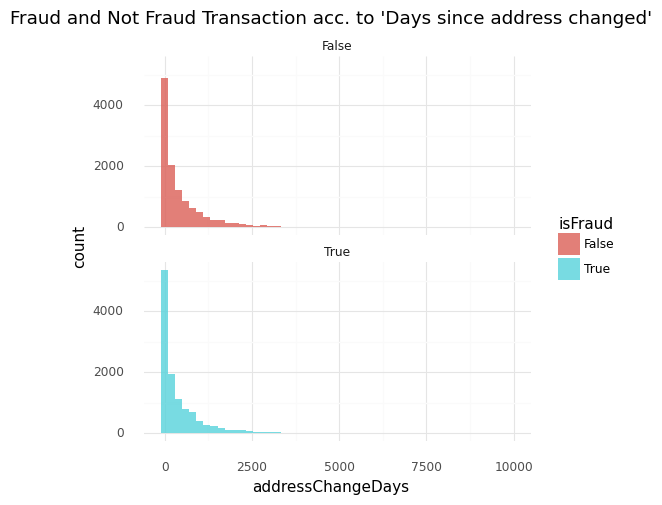

<ggplot: (8769522987581)>

In [46]:
(ggplot(df_sample,aes('addressChangeDays', fill='isFraud'))+
  geom_histogram(bins=50,alpha=0.8,)+
  labs(
    title = "Fraud and Not Fraud Transaction acc. to 'Days since address changed'"
  )+
  facet_wrap('~isFraud',ncol=1)+
  theme_minimal()+
  theme(figure_size = (5, 5)))

/opt/anaconda3/lib/python3.8/site-packages/plotnine/facets/facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


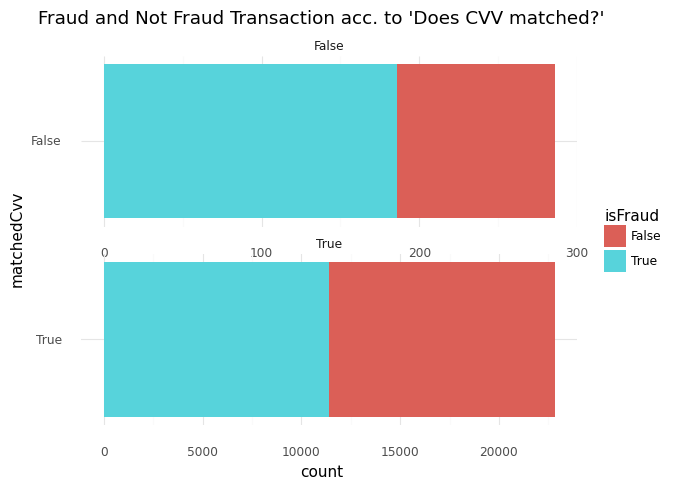

<ggplot: (8769523713344)>

In [47]:
(ggplot(df_sample,aes('matchedCvv', fill='isFraud'))+
  geom_bar()+
  coord_flip()+
  facet_wrap('~matchedCvv', scales = "free", ncol = 1)+
  labs(
    title = "Fraud and Not Fraud Transaction acc. to 'Does CVV matched?'"
  )+
  theme_minimal())
# Too small data for non matched Cvv to make any judgment

Couldn't find any significant difference(visually) in the distribution of Fraud and not Fraud from the feature created. So dropping them.

## Model Development

### Dataset preperation
Here I am removing any row containing NA.

In [48]:
df_sample.dropna(inplace=True)
df_sample = df_sample[df_sample.transactionType == "PURCHASE"]
df_model = df_sample[['creditLimit', 'availableMoney', 'transactionAmount', 'acqCountry','posEntryMode', 
                       'posConditionCode', 'merchantCategoryCode', 'currentBalance', 'cardPresent', 'isFraud']]

Our data to the model is

In [49]:
df_model.head(10).T

,0,1,2,3,4,5,6,7,8,9
creditLimit,15000,5000,10000,15000,5000,10000,5000,20000,10000,2500
availableMoney,7435.04,4900.86,6096.46,4807.01,4756.59,10000,1506.57,17521,7479.86,495.59
transactionAmount,257.21,39.64,26.43,93.32,59.61,7.51,274.27,31.05,129.1,54.64
acqCountry,US,US,CAN,US,US,US,US,US,US,US
posEntryMode,5,2,5,2,5,5,5,5,5,9
posConditionCode,8,1,1,1,1,1,8,1,1,1
merchantCategoryCode,online_retail,fastfood,Other,Other,online_retail,Other,online_retail,entertainment,online_retail,online_retail
currentBalance,7564.96,99.14,3903.54,10193,243.41,0,3493.43,2479.04,2520.14,2004.41
cardPresent,False,True,True,False,False,False,False,True,False,False
isFraud,False,False,False,False,False,False,False,False,False,False


Splitting the data into test and train

In [50]:
df_train_X, df_test_X, df_train_Y, df_test_Y = train_test_split(df_model.loc[:, df_model.columns != 'isFraud'], 
                                                                df_model[["isFraud"]])

### Preprocessor
Lets preprocesses the input data as:  
1. Normalize all numeric data.  
2. Create dummy variable for factors data.  

In [51]:
numeric_features = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['acqCountry','posEntryMode', 'posConditionCode', 'merchantCategoryCode']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


### Model Definition (using Decision Tree)
I am selecting decision tree as model for fraud detection since decision trees are highly interpretable and we can easily see what attribute drives fraud detection the most.

In [52]:
model = DecisionTreeClassifier()

Our Pipeline = preprocessor + model

In [53]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  model)])

In [54]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['creditLimit',
                                                   'availableMoney',
                                                   'transactionAmount',
                                                   'currentBalance']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['acqCountry', 'posEntryMode',
                                                   'posConditionCode',
                                                   'merchantCategoryCode'])])),
                ('classifier', DecisionTreeClassifier())])

# Parameter Tuning
Here I am using grid search approach for:
1. max_depth = [1, 8, 15]
2. min_samples_split = [2, 21, 40]

In [55]:
parameters = {'classifier__max_depth':[1, 8, 15], 'classifier__min_samples_split':[2, 21, 40]}

cv = GridSearchCV(clf, parameters,n_jobs=-1)
cv.fit(df_train_X, df_train_Y)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['creditLimit',
                                                                          'availableMoney',
                                                                          'transactionAmount',
                                                                          'currentBalance']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['acqCountry',
  

In [56]:
for mean, params in zip(cv.cv_results_['mean_test_score'], cv.cv_results_['params']):
      print("Test accuracy of %0.3f for %r" % (mean, params))

Test accuracy of 0.622 for {'classifier__max_depth': 1, 'classifier__min_samples_split': 2}
Test accuracy of 0.622 for {'classifier__max_depth': 1, 'classifier__min_samples_split': 21}
Test accuracy of 0.622 for {'classifier__max_depth': 1, 'classifier__min_samples_split': 40}
Test accuracy of 0.663 for {'classifier__max_depth': 8, 'classifier__min_samples_split': 2}
Test accuracy of 0.663 for {'classifier__max_depth': 8, 'classifier__min_samples_split': 21}
Test accuracy of 0.664 for {'classifier__max_depth': 8, 'classifier__min_samples_split': 40}
Test accuracy of 0.626 for {'classifier__max_depth': 15, 'classifier__min_samples_split': 2}
Test accuracy of 0.630 for {'classifier__max_depth': 15, 'classifier__min_samples_split': 21}
Test accuracy of 0.638 for {'classifier__max_depth': 15, 'classifier__min_samples_split': 40}


So max_depth of 8 and min_samples_split of 2 has highest test accuracy in our 10 fold CV set.

In [57]:
model_final = cv.best_estimator_
model_final = model_final.fit(df_train_X, df_train_Y)
model_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['creditLimit',
                                                   'availableMoney',
                                                   'transactionAmount',
                                                   'currentBalance']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['acqCountry', 'posEntryMode',
                                                   'posConditionCode',
                                                   'merchantCategoryCode'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=8, min_

Testing the model

In [58]:
print("Accuracy of",model_final.score(df_test_X, df_test_Y))

Accuracy of 0.6790101156069365


Metrics Report

In [59]:
from sklearn.metrics import classification_report

y_pred = model_final.predict(df_test_X)

pd.DataFrame.from_dict(classification_report(df_test_Y.values, y_pred,output_dict=True))

,False,True,accuracy,macro avg,weighted avg
precision,0.698315,0.661765,0.67901,0.680040,0.680337
recall,0.648418,0.710613,0.67901,0.679516,0.679010
f1-score,0.672442,0.685320,0.67901,0.678881,0.678776
support,2813.000000,2723.000000,0.67901,5536.000000,5536.000000


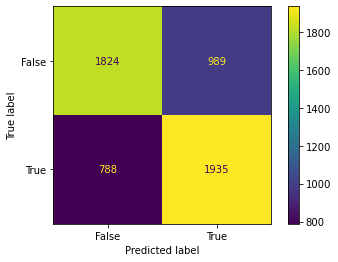

In [60]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_final,df_test_X, df_test_Y)

ROC curve

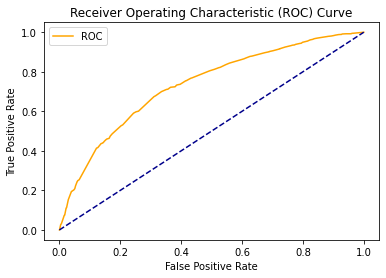

In [61]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

probs = model_final.predict_proba(df_test_X)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(df_test_Y, probs) 
plot_roc_curve(fper, tper)

In [62]:
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.feature_selection._base import SelectorMixin

def get_feature_out(estimator, feature_in):
    if hasattr(estimator,'get_feature_names'):
        if isinstance(estimator, _VectorizerMixin):
            # handling all vectorizers
            return [f'vec_{f}' \
                for f in estimator.get_feature_names()]
        else:
            return estimator.get_feature_names(feature_in)
    elif isinstance(estimator, SelectorMixin):
        return np.array(feature_in)[estimator.get_support()]
    else:
        return feature_in

def get_ct_feature_names(ct):
    # handles all estimators, pipelines inside ColumnTransfomer
    # doesn't work when remainder =='passthrough'
    # which requires the input column names.
    output_features = []

    for name, estimator, features in ct.transformers_:
        if name!='remainder':
            if isinstance(estimator, Pipeline):
                current_features = features
                for step in estimator:
                    current_features = get_feature_out(step, current_features)
                features_out = current_features
            else:
                features_out = get_feature_out(estimator, features)
            output_features.extend(features_out)
        elif estimator=='passthrough':
            output_features.extend(ct._feature_names_in[features])
                
    return output_features

feature_names = get_ct_feature_names(model_final[0])

### Feature importance
Transaction Amount and Merchant category are important predictor for detecting fraudulent transactions.

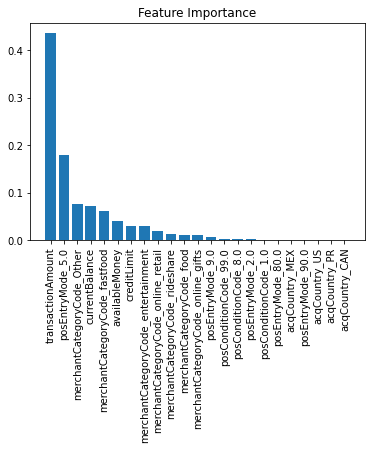

In [63]:
importances = model_final[1].feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(len(feature_names)), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(len(feature_names)), names, rotation=90)

# Show plot
plt.show()

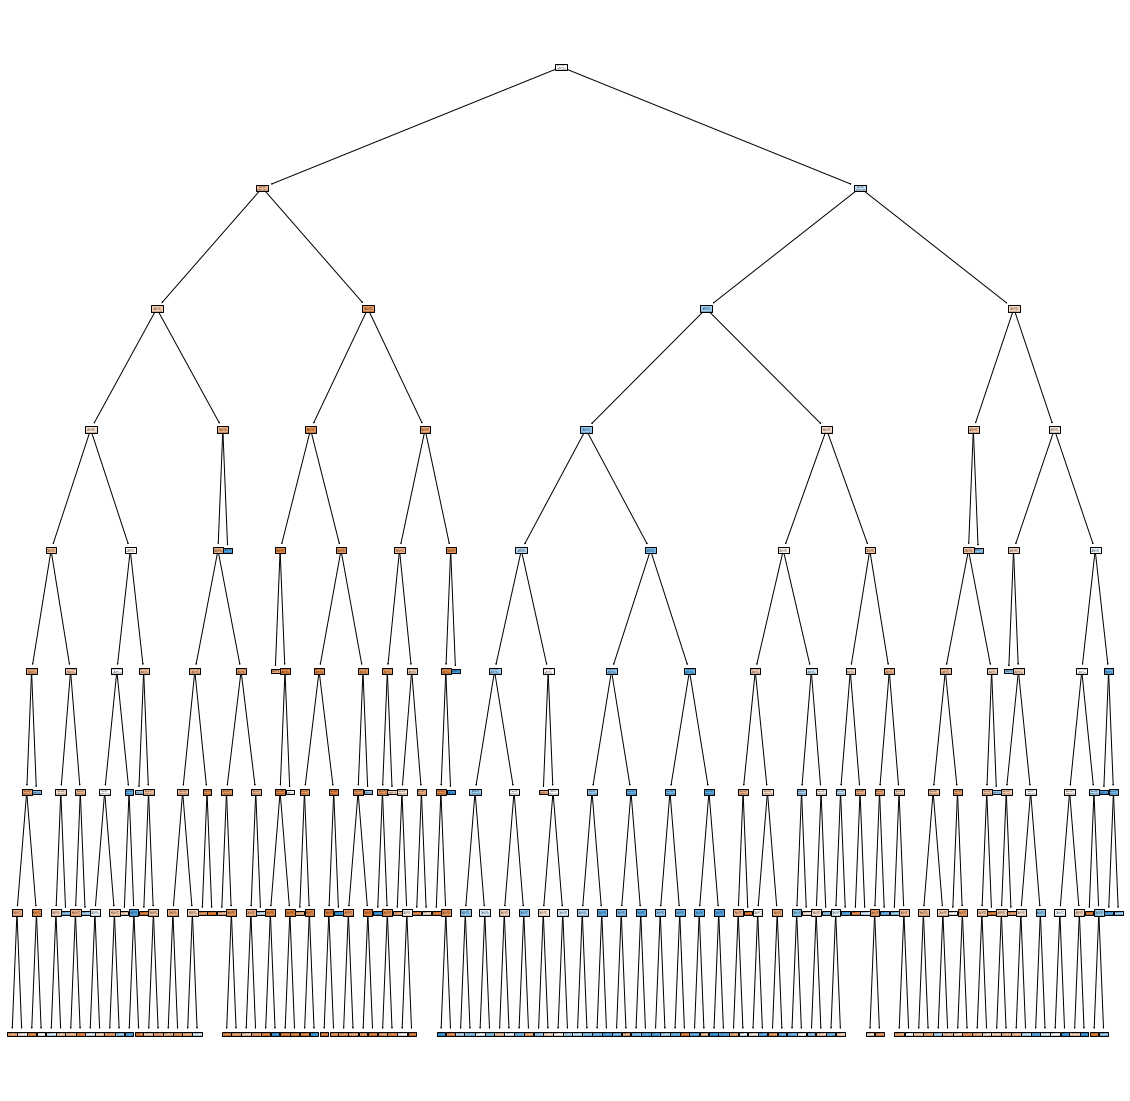

In [64]:
#too big to visualize here
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))
plot_tree(model_final[1], filled=True)
plt.show()

Since I have picked decision tree as the model  
Some advantages of decision trees are:

1. Simple to understand and to interpret. Trees can be visualised.

2. Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed.

3. The cost of using the tree is logarithmic in the number of data points used to train the tree.

4. Able to handle both numerical and categorical data.

The disadvantages of decision trees include:

1. Decision-tree learners can create over-complex trees that do not generalise the data well.

2. Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

## Write up
### In Conclusion, my model accuracy was 0.679 which was lower than I expected. Perhaps it is that this model is not best for the context or it could also have to do with the features that I selected after my analysis of relationships to fraudulent activity for fields of interest, I also wonder if I missed an opportunity by grouping merchant categories. I wasn't surprised to see that there is more fraudulent activity on online shops, but I was surprised to see that there is more fraudulent activity in ridesharing given top companies like Uber and Lyft should have better security measures.

# Remarks

Methods I attempted that didn't work  
* I tried creating features(transDays, expiryDays, addressChangeDays, matchedCvv) but I couldn't find any significant difference(visually) in the distribution of Fraud and not Fraud from the feature created. So I dropped it.


I would have tried following ideas if I had more time   
1. What if purchase and reversal don't follow immediately? For eg, person X bought A and B. Than after a minute X canceled A.  
2. Can 10 minute be considered 'short duration' in multi-swipe transaction. I would try and test different duration.  
3. Instead of dropping row containing missing values, I will look into imputing it.  
4. Balancing the dataset without under sampling. For eg, using Oversampling method such as SMOTE or look into Cost-Sensitive Learning.   
5. Interaction between attributes. For eg, interaction between country and POS entry mode, which would take into account: Does POS entry mode of 09 from Mexico more likely to be fraudulent?  
6. I would look into more complex algorithm for modeling such as SVM or Ensemble learning.  

Some Question I had.  
* Is it possible for current balance to be less than available? Is it due to overdraft?  

In [65]:
df[df.currentBalance < df.availableMoney].accountNumber.count()

385982